In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt

%matplotlib inline

import statsmodels.api as sm
from sklearn import linear_model, datasets
from sklearn.cross_validation import train_test_split

C:\Users\dan.brueckman\Anaconda3\envs\PythonData\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\dan.brueckman\Anaconda3\envs\PythonData\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
url = 'Lending_Club_Stats_2015_v2.csv'
loan = pd.read_csv(url, low_memory = False)

In [3]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,Default_Status
0,1085,10850,36,0.18,D,D5,10+ years,MORTGAGE,47000.0,Fully Paid,home_improvement,CA,0,0
1,2406,15000,36,0.12,C,C1,7 years,OWN,97000.0,Fully Paid,house,IL,0,0
2,3565,4000,36,0.11,B,B4,2 years,OWN,36000.0,Current,car,CT,0,0
3,3713,35000,36,0.09,B,B2,< 1 year,MORTGAGE,200000.0,Current,home_improvement,CA,0,0
4,3783,24000,36,0.08,B,B1,2 years,RENT,98000.0,Current,debt_consolidation,OR,0,0


In [4]:
loan.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 14 columns):
id                421095 non-null int64
loan_amnt         421095 non-null int64
term              421095 non-null int64
int_rate          421095 non-null float64
grade             421095 non-null object
sub_grade         421095 non-null object
emp_length        421095 non-null object
home_ownership    421095 non-null object
annual_inc        421095 non-null float64
loan_status       421095 non-null object
purpose           421095 non-null object
addr_state        421095 non-null object
dti               421095 non-null int64
Default_Status    421095 non-null int64
dtypes: float64(2), int64(5), object(7)
memory usage: 48.2+ MB


In [5]:
loan['emp_length_clean'] = loan.emp_length.str.replace('+','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('<','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('years','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('year','')
loan['emp_length_clean'] = loan.emp_length_clean.str.replace('n/a','0')

In [6]:
loan.emp_length_clean.unique()

array(['10 ', '7 ', '2 ', ' 1 ', '0', '4 ', '3 ', '6 ', '5 ', '1 ', '8 ',
       '9 '], dtype=object)

In [7]:
loan['grade_clean'] = loan['grade'].map({'A':7,'B':6,'C':5,'D':4,'E':3,'F':2,'G':1})

In [8]:
loan_amnt = loan.loan_amnt
mean_loan_amnt = loan[loan.loan_amnt.notnull()].loan_amnt.mean()
loan.loan_amnt.fillna(mean_loan_amnt, inplace=True)


In [9]:
annual_inc = loan.annual_inc
mean_annual_inc = loan[loan.annual_inc.notnull()].annual_inc.mean()
loan.annual_inc.fillna(mean_annual_inc, inplace=True)

In [10]:
emp_length = loan.emp_length_clean
mean_emp_length_clean = loan[loan.emp_length_clean.notnull()].emp_length_clean.mean()
loan.emp_length_clean.fillna(mean_emp_length_clean, inplace=True)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [11]:
grade = loan.grade
mean_grade_clean = loan[loan.grade.notnull()].grade_clean.mean()
loan.grade_clean.fillna(mean_grade_clean, inplace=True)

In [12]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,Default_Status,emp_length_clean,grade_clean
0,1085,10850,36,0.18,D,D5,10+ years,MORTGAGE,47000.0,Fully Paid,home_improvement,CA,0,0,10,4
1,2406,15000,36,0.12,C,C1,7 years,OWN,97000.0,Fully Paid,house,IL,0,0,7,5
2,3565,4000,36,0.11,B,B4,2 years,OWN,36000.0,Current,car,CT,0,0,2,6
3,3713,35000,36,0.09,B,B2,< 1 year,MORTGAGE,200000.0,Current,home_improvement,CA,0,0,1,6
4,3783,24000,36,0.08,B,B1,2 years,RENT,98000.0,Current,debt_consolidation,OR,0,0,2,6


In [13]:
loan.home_ownership.unique().tolist()

['MORTGAGE', 'OWN', 'RENT', 'ANY']

In [14]:
home_ownership = pd.get_dummies(loan.home_ownership)
loan = loan.join(home_ownership)

In [15]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,purpose,addr_state,dti,Default_Status,emp_length_clean,grade_clean,ANY,MORTGAGE,OWN,RENT
0,1085,10850,36,0.18,D,D5,10+ years,MORTGAGE,47000.0,Fully Paid,home_improvement,CA,0,0,10,4,0,1,0,0
1,2406,15000,36,0.12,C,C1,7 years,OWN,97000.0,Fully Paid,house,IL,0,0,7,5,0,0,1,0
2,3565,4000,36,0.11,B,B4,2 years,OWN,36000.0,Current,car,CT,0,0,2,6,0,0,1,0
3,3713,35000,36,0.09,B,B2,< 1 year,MORTGAGE,200000.0,Current,home_improvement,CA,0,0,1,6,0,1,0,0
4,3783,24000,36,0.08,B,B1,2 years,RENT,98000.0,Current,debt_consolidation,OR,0,0,2,6,0,0,0,1


In [16]:
X_Variables_3 = ['RENT', 'MORTGAGE', 'OWN', 'ANY']
X_3 = loan[X_Variables_3]

In [17]:
X_3 = X_3.values

In [18]:
y_3 = loan['Default_Status'].values

In [19]:
clf = linear_model.LogisticRegression()

In [20]:
model_3 = clf.fit(X_3,y_3)

In [21]:
model_3.score(X_3,y_3)


0.83180517460430548

In [22]:
homeowner = pd.DataFrame(list(zip(X_Variables_3, model_3.coef_.T)))

homeowner

,0,1
0,RENT,[-0.207188297938]
1,MORTGAGE,[-0.602404547913]
2,OWN,[-0.379361485317]
3,ANY,[-0.000173227848852]


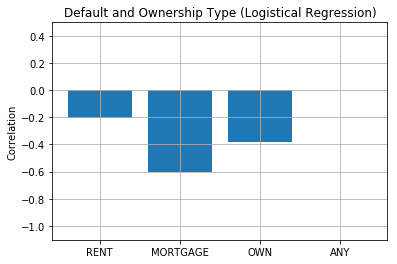

In [113]:
h_x_axis = homeowner[0]
h_y_axis = homeowner[1]
x_axis = np.arange(len(h_x_axis))
plt.bar(x_axis, h_y_axis, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, h_x_axis)

plt.title("Default and Ownership Type (Logistical Regression)")
plt.ylabel("Correlation")

plt.ylim(min(h_y_axis) - .5, max(h_y_axis) + .5)
plt.grid()

plt.savefig("./img/matplotlib_figures/default_and_ownership.png")

plt.show()

In [24]:
loan.purpose.unique().tolist()

['home_improvement',
 'house',
 'car',
 'debt_consolidation',
 'major_purchase',
 'other',
 'credit_card',
 'medical',
 'vacation',
 'small_business',
 'moving',
 'renewable_energy',
 'wedding',
 'educational']

In [25]:
purpose = pd.get_dummies(loan.purpose)
loan = loan.join(purpose)

In [26]:
X_Variables_2 = ['debt_consolidation', 'credit_card', 'home_improvement', 'house','medical','other','major_purchase'
                 ,'car','small_business','vacation','moving','renewable_energy','wedding','educational']
X_2 = loan[X_Variables_2]

In [27]:
X_2 = X_2.values

y_2 = loan['Default_Status'].values

In [28]:
model_2 = clf.fit(X_2,y_2)

model_2.score(X_2,y_2)

0.83180517460430548

In [29]:
Purpose = pd.DataFrame(list(zip(X_Variables_2, model_2.coef_.T)))
Purpose


,0,1
0,debt_consolidation,[-0.0828355068502]
1,credit_card,[-0.405349479613]
2,home_improvement,[-0.289966425413]
3,house,[0.158437817757]
4,medical,[-0.0409169304482]
5,other,[-0.067144337213]
6,major_purchase,[-0.179285537773]
7,car,[-0.38061547776]
8,small_business,[0.320889204008]
9,vacation,[-0.151854204293]


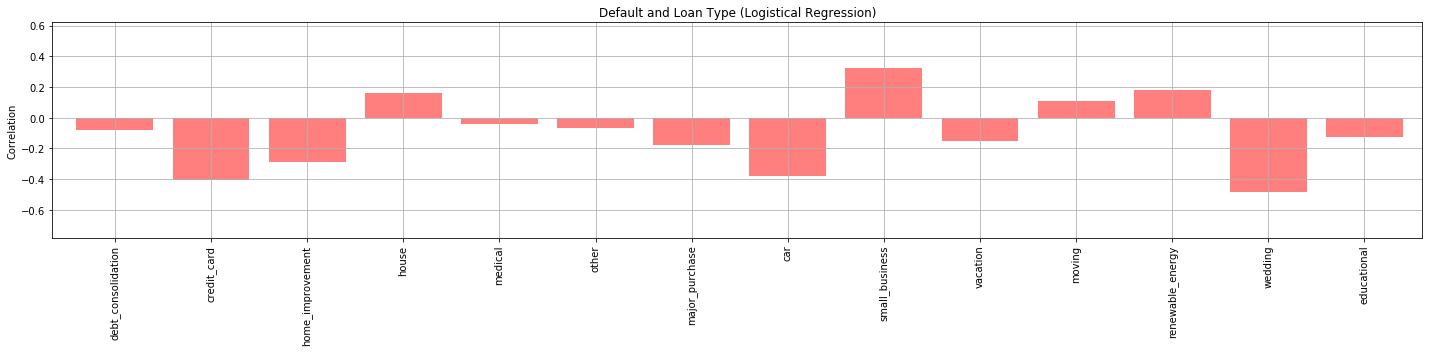

In [114]:
p_x_axis = Purpose[0]
p_y_axis = Purpose[1]

x_axis = np.arange(len(p_x_axis))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,5))
plt.xticks(tick_locations, p_x_axis, rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(min(p_y_axis) - .3, max(p_y_axis) + .3)

plt.title("Default and Loan Type (Logistical Regression)")
plt.ylabel("Correlation")

bars = plt.bar(x_axis, p_y_axis, alpha = .5, color = "r", align="edge")
plt.grid()
plt.tight_layout()
plt.savefig("./img/matplotlib_figures/default_and_loantype.png")

plt.show()

In [31]:
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,1085,10850,36,0.18,D,D5,10+ years,MORTGAGE,47000.0,Fully Paid,...,1,0,0,0,0,0,0,0,0,0
1,2406,15000,36,0.12,C,C1,7 years,OWN,97000.0,Fully Paid,...,0,1,0,0,0,0,0,0,0,0
2,3565,4000,36,0.11,B,B4,2 years,OWN,36000.0,Current,...,0,0,0,0,0,0,0,0,0,0
3,3713,35000,36,0.09,B,B2,< 1 year,MORTGAGE,200000.0,Current,...,1,0,0,0,0,0,0,0,0,0
4,3783,24000,36,0.08,B,B1,2 years,RENT,98000.0,Current,...,0,0,0,0,0,0,0,0,0,0


In [32]:
employed = pd.get_dummies(loan.emp_length)
loan = loan.join(employed)

In [33]:
X_Variables_emp = ['< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']


In [34]:
x = loan[X_Variables_emp]

y = loan['Default_Status'].values

model_emp = clf.fit(x,y)

In [35]:
clf = linear_model.LogisticRegression()

model_emp = clf.fit(x,y)

In [36]:
model_emp.score(x,y)

0.83180517460430548

In [37]:
employ_df = pd.DataFrame(list(zip(x,model_emp.coef_.T)))
employ_df

,0,1
0,< 1 year,[-0.287473153863]
1,1 year,[-0.246619096852]
2,2 years,[-0.303567067754]
3,3 years,[-0.305584907332]
4,4 years,[-0.295608569173]
5,5 years,[-0.302809502003]
6,6 years,[-0.332268917494]
7,7 years,[-0.306520056973]
8,8 years,[-0.290465010496]
9,9 years,[-0.307719254259]


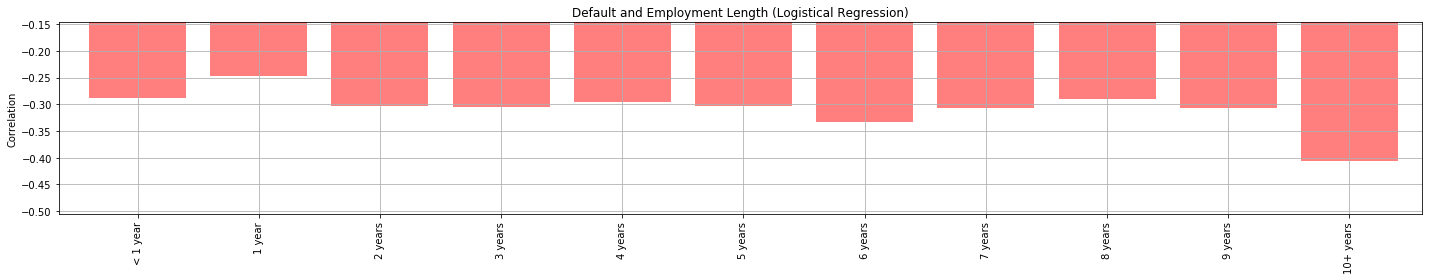

In [115]:
e_x_axis = employ_df[0]
e_y_axis = employ_df[1]

x_axis = np.arange(len(e_x_axis))
tick_locations = [value+0.4 for value in x_axis]

plt.figure(figsize = (20,4))
plt.xticks(tick_locations, e_x_axis, rotation="vertical")

plt.xlim(-0.25, len(x_axis))
plt.ylim(min(e_y_axis) - .1, max(e_y_axis) + .1)

plt.title("Default and Employment Length (Logistical Regression)")
plt.ylabel("Correlation")

bars = plt.bar(x_axis, e_y_axis, alpha = .5, color = "r", align="edge")
plt.grid()
plt.tight_layout()
plt.savefig("./img/matplotlib_figures/default_and_employment.png")

plt.show()

In [39]:
grade = pd.get_dummies(loan.grade)
loan = loan.join(grade)
loan.head()

,id,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,loan_status,...,9 years,< 1 year,n/a,A,B,C,D,E,F,G
0,1085,10850,36,0.18,D,D5,10+ years,MORTGAGE,47000.0,Fully Paid,...,0,0,0,0,0,0,1,0,0,0
1,2406,15000,36,0.12,C,C1,7 years,OWN,97000.0,Fully Paid,...,0,0,0,0,0,1,0,0,0,0
2,3565,4000,36,0.11,B,B4,2 years,OWN,36000.0,Current,...,0,0,0,0,1,0,0,0,0,0
3,3713,35000,36,0.09,B,B2,< 1 year,MORTGAGE,200000.0,Current,...,0,1,0,0,1,0,0,0,0,0
4,3783,24000,36,0.08,B,B1,2 years,RENT,98000.0,Current,...,0,0,0,0,1,0,0,0,0,0


In [40]:
X_Variables_grade = ['A','B','C','D','E','F','G']

x_G = loan[X_Variables_grade]

y_G = loan['Default_Status'].values

In [41]:
clf = linear_model.LogisticRegression()

model_G = clf.fit(x_G,y_G)

In [42]:
model_G.score(x_G,y_G)

0.83180517460430548

In [43]:
Grade_df = pd.DataFrame(list(zip(x_G,model_G.coef_.T)))
Grade_df

,0,1
0,A,[-1.80261320734]
1,B,[-0.978206251847]
2,C,[-0.393658741193]
3,D,[0.0537432698261]
4,E,[0.358809757618]
5,F,[0.727000869452]
6,G,[0.921722180884]


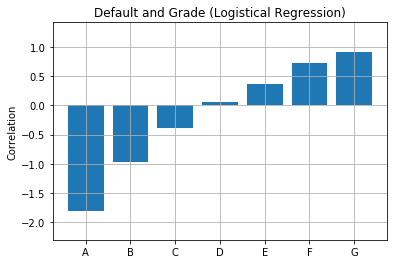

In [116]:
g_x_axis = Grade_df[0]
g_y_axis = Grade_df[1]
x_axis = np.arange(len(g_x_axis))
plt.bar(x_axis, g_y_axis, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, g_x_axis)

plt.title("Default and Grade (Logistical Regression)")
plt.ylabel("Correlation")

plt.ylim(min(g_y_axis) - .5, max(g_y_axis) + .5)
plt.grid()

plt.savefig("./img/matplotlib_figures/default_and_grade.png")

plt.show()

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

In [46]:
url = 'Lending_Club_Stats_2015_v2.csv'
loan2 = pd.read_csv(url, low_memory = False)

In [47]:
data = loan2.drop(["id","grade","sub_grade","emp_length","home_ownership","loan_status","purpose","addr_state"], axis=1)

In [48]:
x = data.drop("Default_Status", axis=1)
y = data['Default_Status']
print(x.shape, y.shape)

(421095, 5) (421095,)


In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1, stratify=y)

In [50]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8318066246386402
Testing Data Score: 0.831800824515075


In [53]:
predictions = classifier.predict(X_test)
print(f"First 10 Predictions:   {predictions[:10]}")
print(f"First 10 Actual labels: {y_test[:10].tolist()}")

First 10 Predictions:   [0 0 0 0 0 0 0 0 0 0]
First 10 Actual labels: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


In [54]:
logistic_regression_prediction = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
logistic_regression_prediction

,Actual,Prediction
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [97]:
lrp_correct = logistic_regression_prediction.loc[logistic_regression_prediction["Actual"] == logistic_regression_prediction["Prediction"]]
correct_percentage = (lrp_correct["Actual"].count())/(logistic_regression_prediction["Actual"].count())*100
correct_percentage

83.180082451507502

In [96]:
lrp_incorrect = logistic_regression_prediction.loc[logistic_regression_prediction["Actual"] != logistic_regression_prediction["Prediction"]]
incorrect_percentage = (lrp_incorrect["Actual"].count())/(logistic_regression_prediction["Actual"].count())*100
incorrect_percentage

16.819917548492505

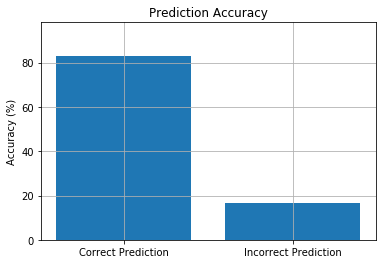

In [103]:
bar_values = [correct_percentage, incorrect_percentage]
bar_names = ["Correct Prediction", "Incorrect Prediction"]
x_axis = np.arange(len(bar_values))
plt.bar(x_axis, bar_values, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, bar_names)

plt.title("Prediction Accuracy")
plt.ylabel("Accuracy (%)")

plt.ylim(0, max(bar_values) + 15)
plt.grid()

plt.savefig("./img/matplotlib_figures/prediction_accuracy.png")

plt.show()

In [55]:
logistic_regression_prediction["Prediction"].mean()

0.0

In [56]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
y_pred = LogReg.predict(X_test)


In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[87567,     0],
       [17707,     0]], dtype=int64)

In [59]:
from sklearn import tree
import pandas as pd

In [60]:
url = 'Lending_Club_Stats_2015_v2.csv'
loan2 = pd.read_csv(url, low_memory = False)

In [61]:
target = loan2["Default_Status"]

In [62]:
target_names = ['Default','Paid']

In [63]:
data = loan2.drop(["Default_Status","id","grade","sub_grade","emp_length","home_ownership","loan_status","purpose","addr_state"], axis=1)

In [64]:

feature_names = data.columns

data.head()

,loan_amnt,term,int_rate,annual_inc,dti
0,10850,36,0.18,47000.0,0
1,15000,36,0.12,97000.0,0
2,4000,36,0.11,36000.0,0
3,35000,36,0.09,200000.0,0
4,24000,36,0.08,98000.0,0


In [65]:
data.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421095 entries, 0 to 421094
Data columns (total 5 columns):
loan_amnt     421095 non-null int64
term          421095 non-null int64
int_rate      421095 non-null float64
annual_inc    421095 non-null float64
dti           421095 non-null int64
dtypes: float64(2), int64(3)
memory usage: 19.3 MB


In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

In [67]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.73769401751619579

In [69]:
from  sklearn.ensemble  import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.80049204931892015

In [70]:
random_forest_df = pd.DataFrame(sorted(zip(rf.feature_importances_, feature_names), reverse=True))
random_forest_df

,0,1
0,0.390348,annual_inc
1,0.318302,loan_amnt
2,0.179983,dti
3,0.101145,int_rate
4,0.010222,term


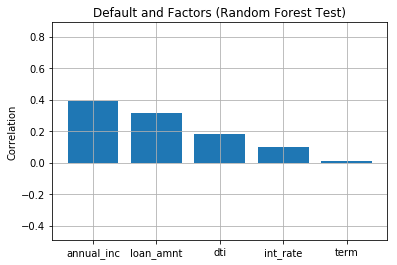

In [119]:
r_x_axis = random_forest_df[1]
r_y_axis = random_forest_df[0]
x_axis = np.arange(len(r_x_axis))
plt.bar(x_axis, r_y_axis, align="edge")
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, r_x_axis)

plt.title("Default and Factors (Random Forest Test)")
plt.ylabel("Correlation")

plt.ylim(min(r_y_axis) - .5, max(r_y_axis) + .5)
plt.grid()

plt.savefig("./img/matplotlib_figures/default_and_factors.png")

plt.show()